In [6]:
%pip install fiona

  Using cached fiona-1.10.1-cp311-cp311-macosx_11_0_arm64.whl.metadata (56 kB)
  Using cached attrs-25.1.0-py3-none-any.whl.metadata (10 kB)
  Using cached click-8.1.8-py3-none-any.whl.metadata (2.3 kB)
  Using cached click_plugins-1.1.1-py2.py3-none-any.whl.metadata (6.4 kB)
  Using cached cligj-0.7.2-py3-none-any.whl.metadata (5.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 135.5 kB/s eta 0:00:0000:0100:05
Note: you may need to restart the kernel to use updated packages.


In [1]:
import os
import fiona
import geopandas as gpd

# Set SHAPE_RESTORE_SHX config option
os.environ['SHAPE_RESTORE_SHX'] = 'YES'

# Path to the shapefile
shapefile_path = 'sfBay.shp'

# Load the shapefile
gdf = gpd.read_file(shapefile_path)
print(gdf.head())

                                            geometry
0  POLYGON ((-123.02146 38.81852, -123.02158 38.8...
1  POLYGON ((-122.69068 38.31983, -122.6918 38.32...
2  MULTIPOLYGON (((-122.90154 38.65693, -122.9016...
3  MULTIPOLYGON (((-122.57571 38.29709, -122.5754...
4  POLYGON ((-122.69068 38.31983, -122.68842 38.3...


/Users/ulrike_imac_air/projects/maps/maps_env/lib/python3.11/site-packages/pyogrio/raw.py:198: RuntimeWarning: sfBay.shp contains polygon(s) with rings with invalid winding order. Autocorrecting them, but that shapefile should be corrected using ogr2ogr for example.
  return ogr_read(


### Basic Spatial Analysis

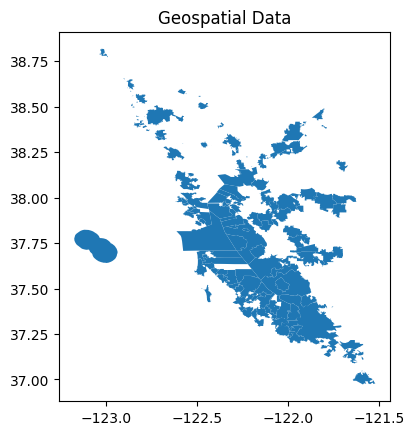

                                            geometry      area
0  POLYGON ((-123.02146 38.81852, -123.02158 38.8...  0.000842
1  POLYGON ((-122.69068 38.31983, -122.6918 38.32...  0.000501
2  MULTIPOLYGON (((-122.90154 38.65693, -122.9016...  0.001184
3  MULTIPOLYGON (((-122.57571 38.29709, -122.5754...  0.003888
4  POLYGON ((-122.69068 38.31983, -122.68842 38.3...  0.001946
                                            geometry  \
0  POLYGON ((-123.02146 38.81852, -123.02158 38.8...   
1  POLYGON ((-122.69068 38.31983, -122.6918 38.32...   
2  MULTIPOLYGON (((-122.90154 38.65693, -122.9016...   
3  MULTIPOLYGON (((-122.57571 38.29709, -122.5754...   
4  POLYGON ((-122.69068 38.31983, -122.68842 38.3...   

                      centroid  
0  POINT (-123.01507 38.79612)  
1  POINT (-122.70919 38.32788)  
2  POINT (-122.86515 38.62253)  
3  POINT (-122.62673 38.24234)  
4  POINT (-122.69645 38.34794)  
                                            geometry  \
0  POLYGON ((-123.02146 38.8185

In [2]:
import matplotlib.pyplot as plt

# Plot the geospatial data
gdf.plot()
plt.title('Geospatial Data')
plt.show()

# Calculate the area of each polygon
gdf['area'] = gdf['geometry'].area
print(gdf[['geometry', 'area']].head())

# Calculate the centroid of each polygon
gdf['centroid'] = gdf['geometry'].centroid
print(gdf[['geometry', 'centroid']].head())

# Buffer each polygon by 0.01 degrees
gdf['buffered'] = gdf['geometry'].buffer(0.01)
print(gdf[['geometry', 'buffered']].head())

#### Spatial Join Example

In [5]:
# Load another shapefile (e.g., points representing locations of interest)
points = gpd.read_file("sfFaces.shp")

# Perform a spatial join to find which points fall within polygons
joined = gpd.sjoin(points, gdf, how="inner", op='within')

# Display the result
print(joined)

TypeError: sjoin() got an unexpected keyword argument 'op'